In [1]:
# importación de las librerias y bibliotecas que serán utilizadas para el análisis y preparación de los datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler

In [2]:
#Lectura del dataset 
df = pd.read_csv('Churn_Modelling.csv')

In [3]:
#Visualización inicial del conjunto de datos
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


# Evaluación de los datos

Vamos analizar la información del dataset para poder conocer un poco los datos con los que estaremos trabajando, asi como para poder determinar que procesos necesitamos implementar.

In [4]:
#Visualizamos la informacion básica del conjunto de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
#Visualización de la información estadística del conjunto de datos
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
# Validación de la correlación entre las variables de entrada con relación a la variable de salida.
corr_matrix = df.corr()
corr_matrix["Exited"].sort_values(ascending=False)

Exited             1.000000
Age                0.285323
Balance            0.118533
EstimatedSalary    0.012097
CustomerId        -0.006248
HasCrCard         -0.007138
Tenure            -0.014001
RowNumber         -0.016571
CreditScore       -0.027094
NumOfProducts     -0.047820
IsActiveMember    -0.156128
Name: Exited, dtype: float64

In [7]:
#Validación si hay algún valor nulo en el conjunto de datos.
df.isna().any()

RowNumber          False
CustomerId         False
Surname            False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

In [8]:
#Validación de la cantidad de ejemplos que posee el dataset segun la variable de salida.
df["Exited"].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [9]:
#Transformación de las columnas categoricas a numericas.
df_new = pd.get_dummies(df, columns=['Geography','Gender'], drop_first=True)

In [10]:
#Eliminación de datos que son irrelevantes y que podrian afectar los resultado.
df_new = df_new.drop(['RowNumber','CustomerId','Surname'], axis=1)

In [11]:
#Vizualición de los cambios aplicados
df_new

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1


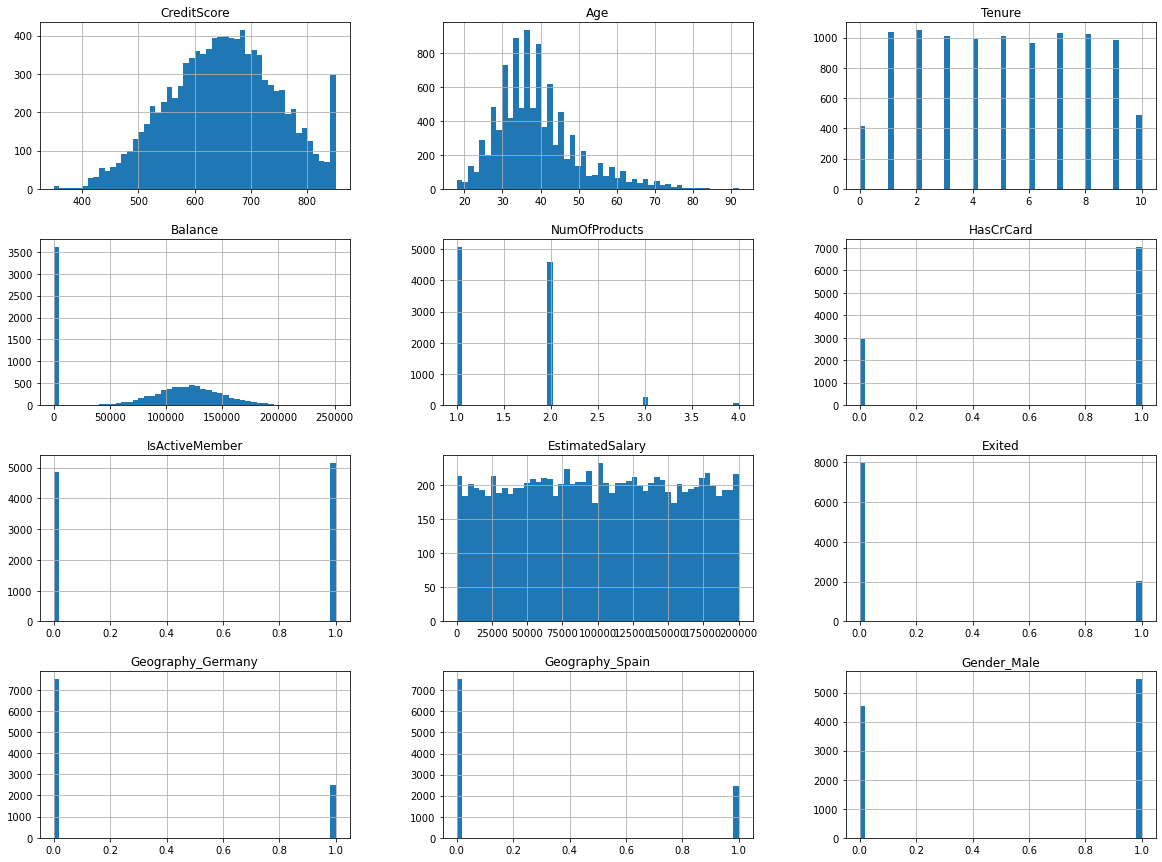

In [12]:
# Representación gráfica de la distribución de los atributos
df_new.hist(bins=50, figsize=(20,15))
plt.show()

In [13]:
edad_grupo = pd.cut(x=df_new['Age'],
                    bins=[18,20,30,40,50,60,70,80,92,float('inf')], 
                    labels=["18-20","20-30","30-40","40-50","50-60","60-70","70-80","80-92","92+"])
edad_total = edad_grupo.value_counts().sort_index()

edad_indexes = edad_total.index.values
edad_valores = edad_total.values

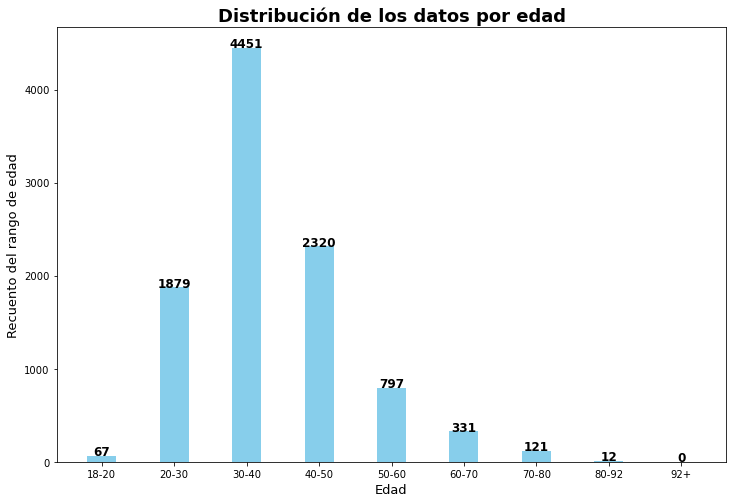

In [14]:
plt.figure(figsize = (12, 8))
 
# Creación de una gráfica bar plot para representar la distribución de la edad
edad_bar = plt.bar(edad_indexes, edad_valores, color ='Skyblue', width = 0.4)
for i, rectangle in enumerate(edad_bar):
    height = rectangle.get_height()
    plt.text(rectangle.get_x() + rectangle.get_width()/2, height+2,
             edad_valores[i], horizontalalignment='center', weight='bold', fontsize=12)
 
plt.xlabel("Edad", fontsize=13)
plt.ylabel("Recuento del rango de edad", fontsize=13)
plt.title("Distribución de los datos por edad", weight='bold', fontsize=18)
plt.show()

In [15]:
sueldo_grupo = pd.cut(x=df_new['EstimatedSalary'], 
                      bins=[10,10000,40000,80000,120000,160000,200000,float('inf')], 
                      labels=["10-10000","10000-40000","40000-80000","80000-120000","120000-160000","160000-200000","200000+"])
sueldo_total = sueldo_grupo.value_counts().sort_index()

sueldo_indexes = sueldo_total.index.values
sueldo_valores = sueldo_total.values

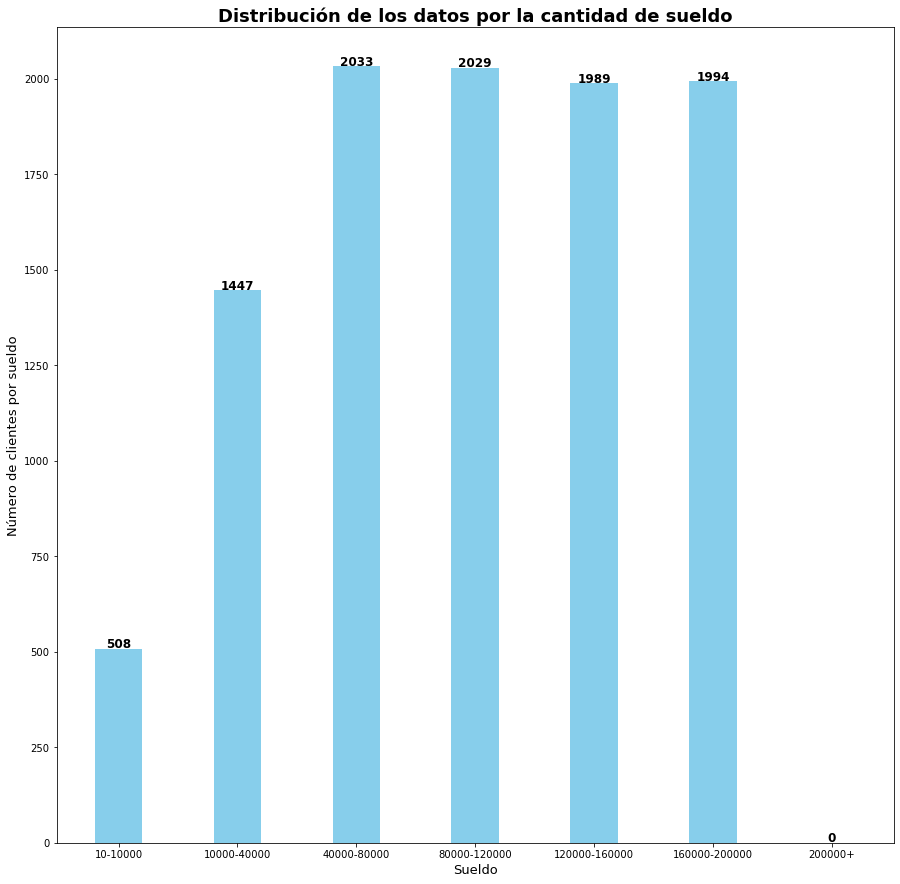

In [16]:
plt.figure(figsize = (15, 15))
 
# Creacion de una gráfica bar plot para representar la distribución del sueldo
sueldo_bar = plt.bar(sueldo_indexes, sueldo_valores, color ='Skyblue', width = 0.4)
for i, rectangle in enumerate(sueldo_bar):
    height = rectangle.get_height()
    plt.text(rectangle.get_x() + rectangle.get_width()/2, height+2,
             sueldo_valores[i], horizontalalignment='center', weight='bold', fontsize=12)
 
plt.xlabel("Sueldo", fontsize=13)
plt.ylabel("Número de clientes por sueldo", fontsize=13)
plt.title("Distribución de los datos por la cantidad de sueldo", weight='bold', fontsize=18)
plt.show()

In [17]:
sueldo_grupo = pd.cut(x=df_new['Balance'], 
                       bins=[10,20000,60000,100000,140000,180000,220000,260000,float('inf')], 
                       labels=["10-20000","40000-60000","60000-100000","100000-140000","140000-180000","180000-220000","220000-260000","260000+"])
sueldo_total = sueldo_grupo.value_counts().sort_index()

sueldo_indexes = sueldo_total.index.values
sueldo_valores = sueldo_total.values

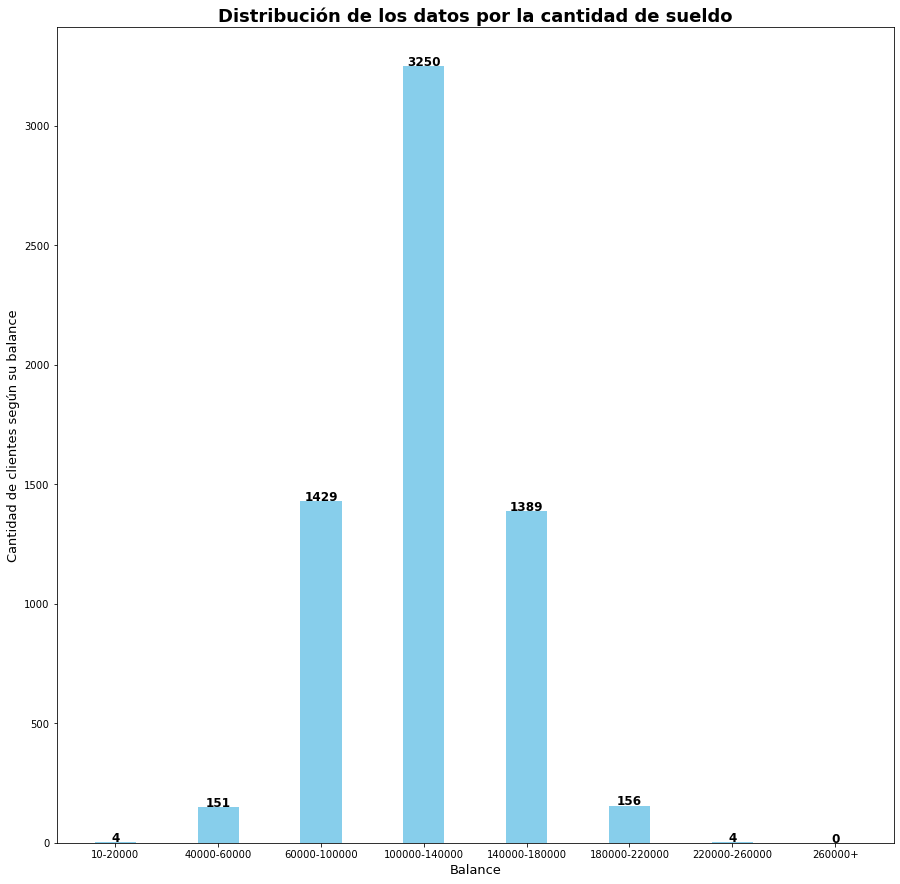

In [18]:
plt.figure(figsize = (15, 15))
 
# Creacion de una gráfica bar plot para representar la distribución del balance
sueldo_bar = plt.bar(sueldo_indexes, sueldo_valores, color ='Skyblue', width = 0.4)
for i, rectangle in enumerate(sueldo_bar):
    height = rectangle.get_height()
    plt.text(rectangle.get_x() + rectangle.get_width()/2, height+2,
             sueldo_valores[i], horizontalalignment='center', weight='bold', fontsize=12)
 
plt.xlabel("Balance", fontsize=13)
plt.ylabel("Cantidad de clientes según su balance", fontsize=13)
plt.title("Distribución de los datos por la cantidad de sueldo", weight='bold', fontsize=18)
plt.show()

Text(0.5, 1.0, 'Gráfica de la cantidad por género que se retiraron del banco o se quedaron')

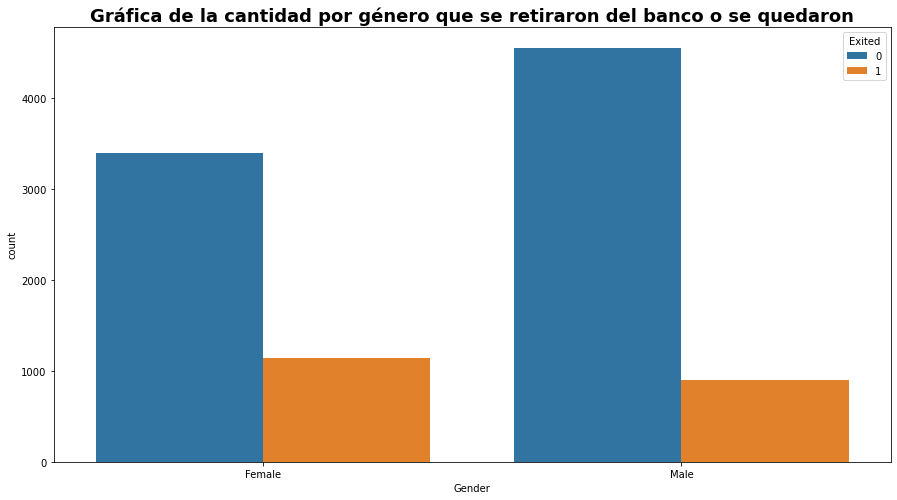

In [19]:
# Creación de una gráfica por género de las personas que hicieron si o no click al anuncio
plt.figure(figsize=[15,8])
sns.countplot(x = 'Gender', hue = 'Exited', data = df)
plt.title('Gráfica de la cantidad por género que se retiraron del banco o se quedaron', weight='bold', fontsize=18)

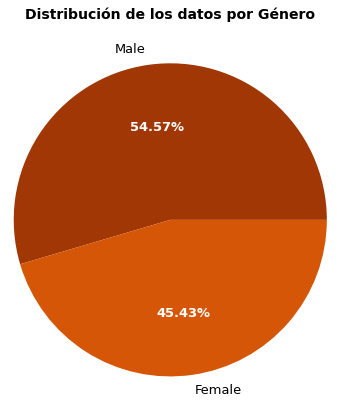

In [20]:
#Creación de una gráfica para representar el porcentaje por género
Gender = df['Gender'].value_counts()

fig, ax = plt.subplots(figsize =(8, 6))
_, _, autotexts = ax.pie(x=Gender, labels=Gender.index, autopct="%.2f%%", radius=1.2,
                         colors=sns.color_palette("YlOrBr_r"), explode=None, textprops=dict(fontsize=13))

ax.set_title('Distribución de los datos por Género', y=1.1, weight='bold', fontsize=14)

for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_weight('bold')

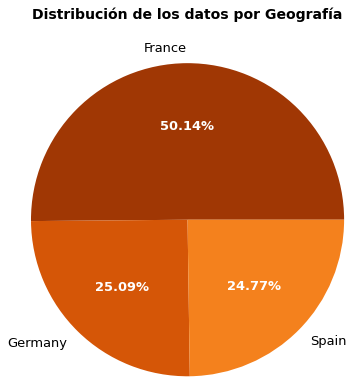

In [21]:
#Creación de una gráfica para representar el porcentaje por Geografía
Gender = df['Geography'].value_counts()

fig, ax = plt.subplots(figsize =(8, 6))
_, _, autotexts = ax.pie(x=Gender, labels=Gender.index, autopct="%.2f%%", radius=1.2,
                         colors=sns.color_palette("YlOrBr_r"), explode=None, textprops=dict(fontsize=13))

ax.set_title('Distribución de los datos por Geografía', y=1.1, weight='bold', fontsize=14)

for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_weight('bold')

## Escalado de los datos

In [22]:
# Conjunto de datos general
X_df = df_new.drop("Exited", axis=1)
y_df = df_new["Exited"].copy()

In [23]:
#Escalado de los datos
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X_df)

In [24]:
# Transformación a un DataFrame de Pandas
X_scaled = pd.DataFrame(X_scaled, columns=X_df.columns, index=X_df.index)

In [25]:
#Visualización de los cambios
X_scaled

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,-0.246269,0.416667,-0.75,-0.761480,0.0,0.0,0.0,0.011739,0.0,0.0,-1.0
1,-0.328358,0.333333,-1.00,-0.104906,0.0,-1.0,0.0,0.125512,0.0,1.0,-1.0
2,-1.119403,0.416667,0.75,0.489346,2.0,0.0,-1.0,0.139630,0.0,0.0,-1.0
3,0.350746,0.166667,-1.00,-0.761480,1.0,-1.0,-1.0,-0.064717,0.0,0.0,-1.0
4,1.477612,0.500000,-0.75,0.221806,0.0,0.0,0.0,-0.214561,0.0,1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...
9995,0.888060,0.166667,0.00,-0.761480,1.0,0.0,-1.0,-0.039876,0.0,0.0,0.0
9996,-1.014925,-0.166667,1.25,-0.312031,0.0,0.0,0.0,0.015306,0.0,0.0,0.0
9997,0.425373,-0.083333,0.50,-0.761480,0.0,-1.0,0.0,-0.590615,0.0,0.0,-1.0
9998,0.895522,0.416667,-0.50,-0.173319,1.0,0.0,-1.0,-0.074252,1.0,0.0,0.0


## Balanceo del dataset

Según el análisis realizado, el conjunto de datos posee un desbalance con 7963 clientes que se quedan en el banco y 2037 personas que se van del banco, al entrenar los diferentes algoritmos generaria una matriz de confusión desbalanceda, por lo que se hara uso de la combinación de las tecnicas de sobremuestreo y submuestreo para equuilibrar la cantidad de datos.

## Sobremuestreo + Submuestreo

In [26]:
no = y_df.sum()
si = y_df.shape[0]- no
print('Personas que se quedan en el banco:',si, 'Personas que se van del banco:', no)

Personas que se quedan en el banco: 7963 Personas que se van del banco: 2037


In [27]:
#Importamos los paquetes
from imblearn.combine import SMOTETomek

#Inicialización del método combinado
#SMOTE Tomek
smoteT = SMOTETomek()

In [28]:
#Sobremuestreo con Smote seguido de un submuestreo con Uniones de Tomek
X_smoteT, y_smoteT = smoteT.fit_resample(X_scaled, y_df)
no_smoteT = y_smoteT.sum()
si_smoteT = y_smoteT.shape[0]- no_smoteT
print('Personas que se quedan en el banco:', no_smoteT,'Personas que se van del banco:', si_smoteT )
X_smoteT

Personas que se quedan en el banco: 7872 Personas que se van del banco: 7872


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,-0.246269,0.416667,-0.750000,-0.761480,0.0,0.0,0.0,0.011739,0.000000,0.0,-1.0
1,-0.328358,0.333333,-1.000000,-0.104906,0.0,-1.0,0.0,0.125512,0.000000,1.0,-1.0
2,-1.119403,0.416667,0.750000,0.489346,2.0,0.0,-1.0,0.139630,0.000000,0.0,-1.0
3,0.350746,0.166667,-1.000000,-0.761480,1.0,-1.0,-1.0,-0.064717,0.000000,0.0,-1.0
4,1.477612,0.500000,-0.750000,0.221806,0.0,0.0,0.0,-0.214561,0.000000,1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...
15739,1.043316,-0.623527,0.482129,0.159863,0.0,-1.0,-1.0,0.436090,1.000000,0.0,0.0
15740,0.548681,1.471004,-0.500000,-0.536606,0.0,0.0,-1.0,-0.119259,0.000000,0.0,-1.0
15741,-0.763951,0.175701,1.000000,0.206503,2.0,0.0,0.0,0.575060,0.369471,0.0,0.0
15742,-0.956700,0.126557,-1.000000,0.382293,0.0,0.0,0.0,0.239094,0.839563,0.0,-1.0


## Entrenar y evaluar utilizando regresión logística

In [29]:
#División del dataset en conjunto de entramiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_smoteT, y_smoteT, test_size = 0.25, random_state=0)

In [30]:
# Entrenamos un algoritmo basado en regresión logística
from sklearn.linear_model import LogisticRegression

#Creación del modelo
clf = LogisticRegression(random_state =0).fit(X_train, y_train)

In [31]:
#Prediccion con el conjunto de pruebas
y_pred = clf.predict(X_val)

In [32]:
#Validación del accuracy
from sklearn.metrics import accuracy_score
print('Accuracy: {:.3f}'.format(accuracy_score(y_val, y_pred)))

Accuracy: 0.718


In [33]:
#Validación de la matriz de confusión
from sklearn.metrics import confusion_matrix
confusion_matrix(y_val, y_pred)

array([[1423,  534],
       [ 576, 1403]], dtype=int64)

C:\Users\eliza\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


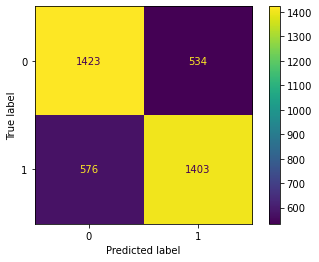

In [34]:
#Representación gráfica de los resultados de la matriz de confusión con el conjunto de pruebas
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, X_val, y_val, values_format='3g')

In [35]:
#Descripción de los resultados de diferentes métricas de medición sobre el modelo entrenado y probado
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

[[1423  534]
 [ 576 1403]]
              precision    recall  f1-score   support

           0       0.71      0.73      0.72      1957
           1       0.72      0.71      0.72      1979

    accuracy                           0.72      3936
   macro avg       0.72      0.72      0.72      3936
weighted avg       0.72      0.72      0.72      3936



## Entrenar y evaluar utilizando bosques aleatorios

In [36]:
#División del dataset en conjunto de entramiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_smoteT, y_smoteT, test_size = 0.25, random_state=0)

In [37]:
# Importación de la librería 
from sklearn.ensemble import RandomForestClassifier

#Creación del modelo
ranforest = RandomForestClassifier()
ranforest.fit(X_train, y_train)

RandomForestClassifier()

In [38]:
#Prediccion con el conjunto de pruebas
y_pred = ranforest.predict(X_val)

In [39]:
#Validación del accuracy
from sklearn.metrics import accuracy_score
print('Accuracy: {:.3f}'.format(accuracy_score(y_val, y_pred)))

Accuracy: 0.902


In [40]:
#Validación de la matriz de confusión
from sklearn.metrics import confusion_matrix
confusion_matrix(y_val, y_pred)

array([[1769,  188],
       [ 199, 1780]], dtype=int64)

C:\Users\eliza\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


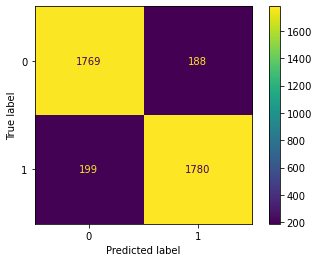

In [41]:
#Representación gráfica de los resultados de la matriz de confusión con el conjunto de pruebas
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(ranforest, X_val, y_val, values_format='3g')

In [42]:
#Descripción de los resultados de diferentes métricas de medición sobre el modelo entrenado y probado
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

[[1769  188]
 [ 199 1780]]
              precision    recall  f1-score   support

           0       0.90      0.90      0.90      1957
           1       0.90      0.90      0.90      1979

    accuracy                           0.90      3936
   macro avg       0.90      0.90      0.90      3936
weighted avg       0.90      0.90      0.90      3936



## Entrenar y evaluar utilizando redes neuronales

In [43]:
#División del dataset en conjunto de entramiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_smoteT, y_smoteT, test_size = 0.25, random_state=0)

In [44]:
# Importación de Keras y librerías adicionales
import keras
from keras.models import Sequential
from keras.layers import Dense

In [49]:
#Inicializar la red neuronal
classifier = Sequential()
#Definición de las capas de entrada y primera capa oculta 
classifier.add(Dense(units = 6, kernel_initializer = "uniform",  activation = "relu", input_dim = 11))
#Segunda capa oculta 
classifier.add(Dense(units = 4, kernel_initializer = "uniform",  activation = "relu"))
#Tercera capa oculta 
classifier.add(Dense(units = 2, kernel_initializer = "uniform",  activation = "relu"))
#Capa de salida
classifier.add(Dense(units = 1, kernel_initializer = "uniform",  activation = "sigmoid"))

In [50]:
# Compilación de la RNA
classifier.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [51]:
#Ajustamos la red neuronal
classifier.fit(X_train, y_train,  batch_size = 25, epochs = 100)

Epoch 1/100
473/473 [==============================] - 1s 685us/step - loss: 0.6636 - accuracy: 0.6103
Epoch 2/100
473/473 [==============================] - 0s 651us/step - loss: 0.5985 - accuracy: 0.7221
Epoch 3/100
473/473 [==============================] - 0s 767us/step - loss: 0.5804 - accuracy: 0.7245
Epoch 4/100
473/473 [==============================] - 0s 679us/step - loss: 0.5717 - accuracy: 0.7220
Epoch 5/100
473/473 [==============================] - 0s 686us/step - loss: 0.5663 - accuracy: 0.7251
Epoch 6/100
473/473 [==============================] - 0s 729us/step - loss: 0.5625 - accuracy: 0.7259
Epoch 7/100
473/473 [==============================] - 0s 685us/step - loss: 0.5582 - accuracy: 0.7290
Epoch 8/100
473/473 [==============================] - 0s 705us/step - loss: 0.5533 - accuracy: 0.7328
Epoch 9/100
473/473 [==============================] - 0s 730us/step - loss: 0.5455 - accuracy: 0.7350
Epoch 10/100
473/473 [==============================] - 0s 703us/step - l

473/473 [==============================] - 0s 779us/step - loss: 0.4344 - accuracy: 0.7957
Epoch 80/100
473/473 [==============================] - 0s 896us/step - loss: 0.4341 - accuracy: 0.7957
Epoch 81/100
473/473 [==============================] - 0s 706us/step - loss: 0.4340 - accuracy: 0.7960
Epoch 82/100
473/473 [==============================] - 0s 689us/step - loss: 0.4346 - accuracy: 0.7945
Epoch 83/100
473/473 [==============================] - 0s 699us/step - loss: 0.4344 - accuracy: 0.7939
Epoch 84/100
473/473 [==============================] - 0s 710us/step - loss: 0.4349 - accuracy: 0.7938
Epoch 85/100
473/473 [==============================] - 0s 766us/step - loss: 0.4341 - accuracy: 0.79600s - loss: 0.4234 - ac
Epoch 86/100
473/473 [==============================] - 0s 796us/step - loss: 0.4342 - accuracy: 0.7959
Epoch 87/100
473/473 [==============================] - 0s 651us/step - loss: 0.4342 - accuracy: 0.7942
Epoch 88/100
473/473 [==============================] -

In [52]:
#Prediccion con el conjunto de pruebas
y_pred  = classifier.predict(X_val)
y_pred = (y_pred>0.5)

In [53]:
#Validación del accuracy
from sklearn.metrics import accuracy_score
print('Accuracy: {:.3f}'.format(accuracy_score(y_val, y_pred)))

Accuracy: 0.794


In [54]:
#Validación de la matriz de confusión
from sklearn.metrics import confusion_matrix
confusion_matrix(y_val, y_pred)

array([[1604,  353],
       [ 456, 1523]], dtype=int64)

<AxesSubplot:>

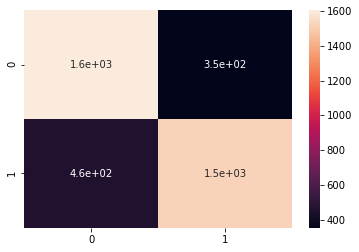

In [55]:
#Representación gráfica de los resultados de la matriz de confusión con el conjunto de pruebas
cm = confusion_matrix(y_val, y_pred)
sns.heatmap(cm, annot=True)

In [56]:
#Descripción de los resultados de diferentes métricas de medición sobre el modelo entrenado y probado
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

[[1604  353]
 [ 456 1523]]
              precision    recall  f1-score   support

           0       0.78      0.82      0.80      1957
           1       0.81      0.77      0.79      1979

    accuracy                           0.79      3936
   macro avg       0.80      0.79      0.79      3936
weighted avg       0.80      0.79      0.79      3936

